In [134]:
from sklearn.datasets import make_blobs
from sklearn import model_selection as ms
from numpy import float32
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter, show, imshow, hist
from cv2 import ml
import os
from PIL import Image
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import rgb_to_hsv
import skimage.measure
import kagglehub
import pydicom as dicom

In [10]:
pwd

'c:\\Users\\Ganda\\AppData\\Local\\Programs\\Microsoft VS Code'

In [13]:
cd \\wsl.localhost\Ubuntu\home\hasani\BIOMProject\ECE431ProjectSpring2025

\\wsl.localhost\Ubuntu\home\hasani\BIOMProject\ECE431ProjectSpring2025


In [16]:
pwd

'\\\\wsl.localhost\\Ubuntu\\home\\hasani\\BIOMProject\\ECE431ProjectSpring2025'

In [56]:
img = dicom.dcmread('pixel_segmenter/CT_data/i0090,0000b.dcm')
imgDCM = img.pixel_array

In [57]:
print(imgDCM.max())

2409


Text(0.5, 1.0, 'Original CT Scan Data')

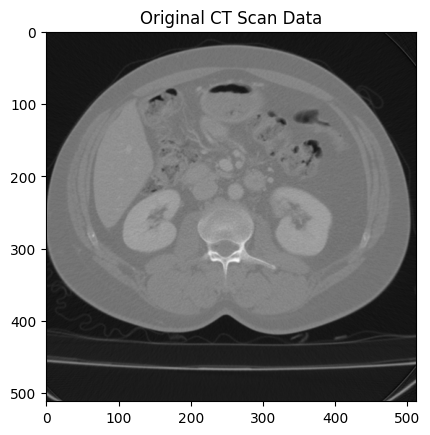

In [153]:
imshow(imgDCM, cmap='gray')
plt.title('Original CT Scan Data')

In [70]:
groundTruth = Image.open('pixel_segmenter/CT_data/liver_GT_090.png')
groundTruth = np.asarray(groundTruth)

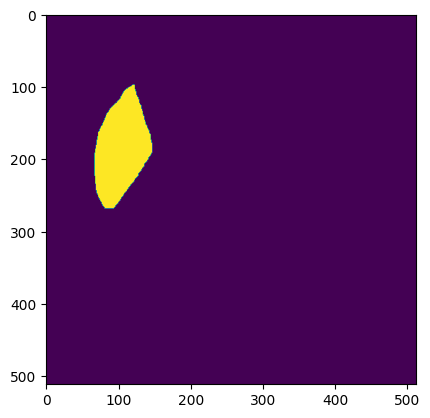

In [71]:
imshow(groundTruth)

In [67]:
norm_bayes = ml.NormalBayesClassifier_create()

In [65]:
imgDCM.shape

(512, 512)

In [104]:
Output1 = Image.open('pixel_segmenter/CT_data/liver_GT_090.png')
Output1 = np.asarray(groundTruth)
Image1 = dicom.dcmread('pixel_segmenter/CT_data/i0090,0000b.dcm')
Image1 = Image1.pixel_array
Image1 = skimage.measure.block_reduce(imgDCM, 2, np.average).reshape((65536))
Output1 = skimage.measure.block_reduce(groundTruth, 2, np.average).reshape((65536))
totalInput = Image1
totalOutput = Output1

Output1 = Image.open('pixel_segmenter/CT_data/liver_GT_091.png')
Output1 = np.asarray(groundTruth)
Image1 = dicom.dcmread('pixel_segmenter/CT_data/i0091,0000b.dcm')
Image1 = Image1.pixel_array
Image1 = skimage.measure.block_reduce(imgDCM, 2, np.average).reshape((65536))
Output1 = skimage.measure.block_reduce(groundTruth, 2, np.average).reshape((65536))
totalInput = np.append(totalInput, Image1)
totalOutput = np.append(totalOutput, Output1)

Output1 = Image.open('pixel_segmenter/CT_data/liver_GT_092.png')
Output1 = np.asarray(groundTruth)
Image1 = dicom.dcmread('pixel_segmenter/CT_data/i0092,0000b.dcm')
Image1 = Image1.pixel_array
Image1 = skimage.measure.block_reduce(imgDCM, 2, np.average).reshape((65536))
Output1 = skimage.measure.block_reduce(groundTruth, 2, np.average).reshape((65536))
totalInput = np.append(totalInput, Image1)
totalOutput = np.append(totalOutput, Output1)

Output1 = Image.open('pixel_segmenter/CT_data/liver_GT_093.png')
Output1 = np.asarray(groundTruth)
Image1 = dicom.dcmread('pixel_segmenter/CT_data/i0093,0000b.dcm')
Image1 = Image1.pixel_array
Image1 = skimage.measure.block_reduce(imgDCM, 2, np.average).reshape((65536))
Output1 = skimage.measure.block_reduce(groundTruth, 2, np.average).reshape((65536))
totalInput = np.append(totalInput, Image1)
totalOutput = np.append(totalOutput, Output1)

Output1 = Image.open('pixel_segmenter/CT_data/liver_GT_094.png')
Output1 = np.asarray(groundTruth)
Image1 = dicom.dcmread('pixel_segmenter/CT_data/i0094,0000b.dcm')
Image1 = Image1.pixel_array
Image1 = skimage.measure.block_reduce(imgDCM, 2, np.average).reshape((65536))
Output1 = skimage.measure.block_reduce(groundTruth, 2, np.average).reshape((65536))
totalInput = np.append(totalInput, Image1)
totalOutput = np.append(totalOutput, Output1)

In [138]:
Image1.max()

2369.25

In [128]:
totalOutput.shape

(327680,)

In [129]:
norm_bayes.train(totalInput.astype(float32), ml.ROW_SAMPLE, totalOutput.astype(int))

True

In [130]:
ret, labels_pred, output_probs = norm_bayes.predictProb(Image1.astype(float32))

Text(0, 0.5, 'Number of Pixels')

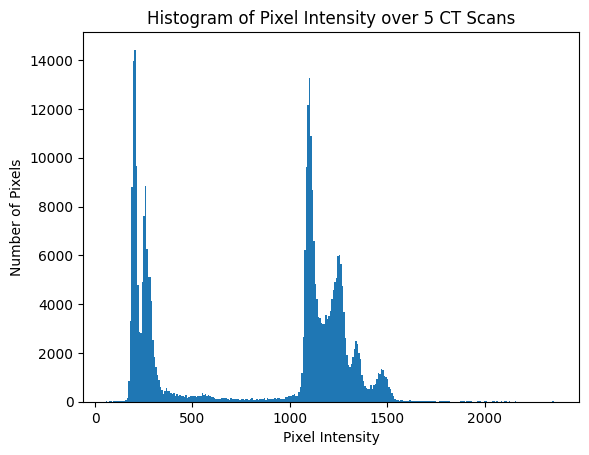

In [140]:
hist(totalInput, bins=300)
plt.title('Histogram of Pixel Intensity over 5 CT Scans')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')

In [226]:
output_probs.size

524288

In [227]:
labels_pred.size

262144

In [276]:
print(labels_pred.max())

255


In [284]:
print(len(labels_pred))

107753


(array([61073.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4463.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

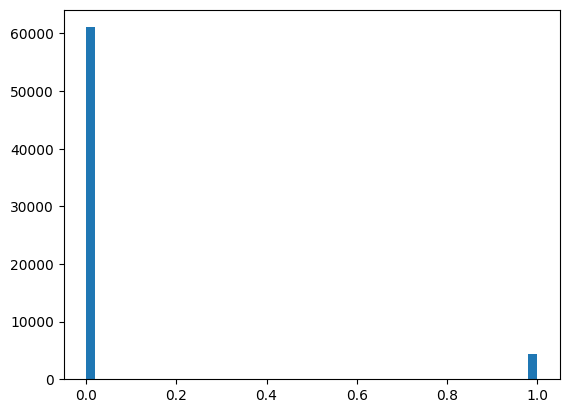

In [97]:
hist(labels_pred, bins=50)

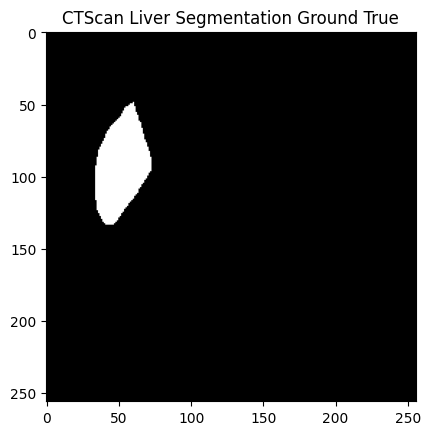

In [146]:
skin_mask = Output1.reshape(256, 256, 1) == 1

# Display the segmented image
imshow(skin_mask, cmap='gray')
plt.title('CTScan Liver Segmentation Ground True')
show()

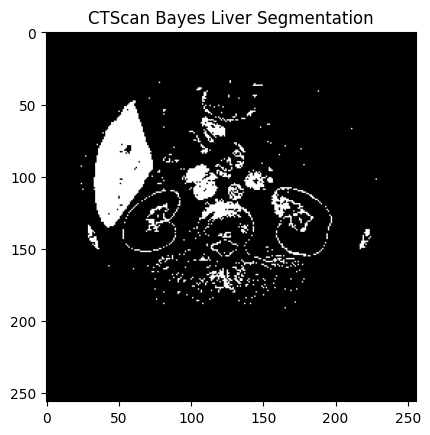

In [147]:
skin_mask = labels_pred.reshape(256, 256, 1) == 1

# Display the segmented image
imshow(skin_mask, cmap='gray')
plt.title('CTScan Bayes Liver Segmentation')
show()

TypeError: Invalid shape (65536,) for image data

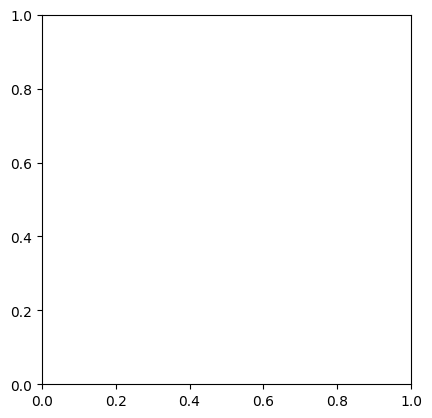

In [150]:
skin_mask = Image1.reshape(256, 256, 1) == 1

# Display the segmented image
imshow(Image1)
plt.title('CTScan Bayes Liver Segmentation')
show()